# Урок 2. Домашнее задание

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [940]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [941]:
X_, y_, coef = datasets.make_regression(n_samples=100, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [942]:
w = np.linalg.inv(X_.T @ X_) @ X_.T @ y_
w

array([86.85290273, 74.10093365])

# а) градиентный спуск

In [943]:
def mean_sq_err(y_, y_pred):
    err = np.mean((y_ - y_pred)**2)
    return err

In [944]:
errors_gd = []

In [945]:
def gradient_descent(X_, y_, iterations, alpha):
    np.random.seed(42)
    w = np.random.randn(X_.shape[1])
    n = X_.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X_, w)
        err = mean_sq_err(y_, y_pred)
        errors_gd.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y_), X_))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [946]:
w_gd = gradient_descent(X_, y_, iterations=2000, alpha=1e-2)
y_pred = np.dot(X_, w_gd)
err_gd = mean_sq_err(y_, y_pred)

200 [82.67522107 72.98907436] 43.564213808815346
400 [86.64323619 74.09307726] 28.79854054411152
600 [86.84223393 74.10142749] 28.764997644042495
800 [86.85235712 74.10097534] 28.764911188770917
1000 [86.85287477 74.10093609] 28.764910961986047
1200 [86.85290129 74.10093378] 28.764910961389795
1400 [86.85290265 74.10093366] 28.76491096138825
1600 [86.85290272 74.10093365] 28.764910961388246
1800 [86.85290273 74.10093365] 28.764910961388242
2000 [86.85290273 74.10093365] 28.764910961388242


Text(0, 0.5, 'Среднеквадратическая ошибка')

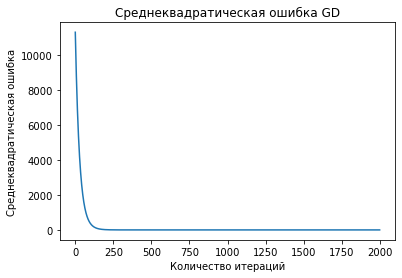

In [947]:
plt.plot(range(len(errors_gd)), errors_gd)
plt.title('Среднеквадратическая ошибка GD')
plt.xlabel('Количество итераций')
plt.ylabel('Среднеквадратическая ошибка')

# б) стохастический градиентный спуск

In [948]:
errors_sgd = []

In [949]:
def stochastic_gradient_descent(X_, y_, iterations, alpha):
    np.random.seed(42)
    w = np.random.randn(X_.shape[1])
    n = X_.shape[0]
    for i in range(1, iterations + 1):
        err = mean_sq_err(y_, np.dot(X_, w))
        ind = np.random.randint(n)
        y_pred = np.dot(X_[ind], w)
        errors_sgd.append(err)
        w -= alpha * (2 * np.dot((y_pred - y_[ind]), X_[ind]))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, err

In [950]:
w_sgd = stochastic_gradient_descent(X_, y_, iterations=4500, alpha=1e-3)
y_pred = np.dot(X_, w_sgd)
err_sgd = mean_sq_err(y_, y_pred)

450 [44.24142488 42.63925973] 2412.8149332928533
900 [65.45730033 61.15220424] 546.3712544808794
1350 [75.98924569 68.58311473] 149.03960866765837
1800 [81.91643756 72.05082405] 51.47577871646484
2250 [84.28243942 73.49845041] 34.10227927466853
2700 [85.38821083 73.91899779] 30.45833752446661
3150 [85.99170302 73.98416886] 29.336751282101368
3600 [86.39483844 74.07812172] 28.937591959036016
4050 [86.64316811 74.0643608 ] 28.796057571221322
4500 [86.86872429 74.11929617] 28.765103695536244


Text(0, 0.5, 'Среднеквадратическая ошибка')

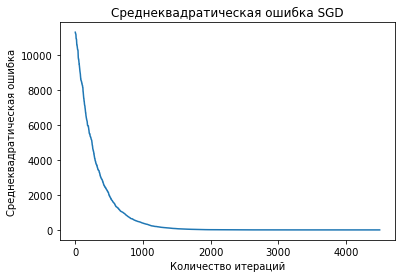

In [951]:
plt.plot(range(len(errors_sgd)), errors_sgd)
plt.title('Среднеквадратическая ошибка SGD')
plt.xlabel('Количество итераций')
plt.ylabel('Среднеквадратическая ошибка')

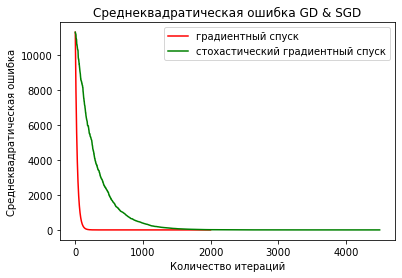

In [952]:
plt.plot(range(len(errors_gd)), errors_gd, color='r', label='градиентный спуск')
plt.plot(range(len(errors_sgd)), errors_sgd, color='g', label='стохастический градиентный спуск')
plt.title('Среднеквадратическая ошибка GD & SGD')
plt.xlabel('Количество итераций')
plt.ylabel('Среднеквадратическая ошибка')
plt.legend()
plt.show()

В данном случае условная сходимость методов достигается посредством увеличения количества итераций (с 2000 до 4500) и уменьшения шага градиентного спуска (с 10^-2 до 10^-3) при использовании метода стохастического градиентного спуска.